>
> # MaaS Sim tutorial
>
> ## Traveller Agent
>
-----

Traveller in the MaaSSim is a `process` of `simpy.Environment`. 

It is executed as a sequence of steps `travellerEvent` from the request to arrival at the destination.

Main routine is `PassengerAgent.pax_action` 

Travellers are instantiated from requests and passengers of `inData` while creating MaaSSim simulator.

Defined as a class in `traveller.py`

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import MaaSSim
import MaaSSim.utils
import logging
from MaaSSim.simulators import simulate
from MaaSSim.traveller import PassengerAgent, travellerEvent
from MaaSSim.data_structures import structures as inData

In [3]:
params = MaaSSim.utils.get_config('../../data/config/default.json')

In [4]:
inData = MaaSSim.utils.load_G(inData, params, stats = True) #
inData = MaaSSim.utils.prep_supply_and_demand(inData, params)  # generate supply and demand
sim = simulate(inData, params = params, _print = False, logger_level = logging.WARNING) 

01-10-20 11:30:00-WARNING-Setting up 1h simulation at 2020-10-01 11:04:42 for 5 vehicles and 20 passengers in Nootdorp, Netherlands
01-10-20 11:30:01-WARNING-simulation time 0.6 s
01-10-20 11:30:01-WARNING-assertion tests for simulation results - passed


## passengerAgent

In [5]:
self = sim.pax[3]

/Users/rkucharski/Documents/GitHub/MaaSSim/MaaSSim/visualizations.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_num'] = df.apply(lambda x: travellerEvent[x.event].value, axis=1)


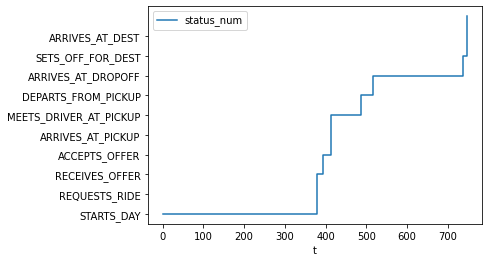

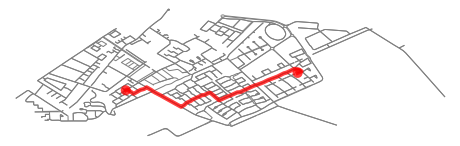

In [15]:
from MaaSSim.visualizations import plot_trip
plot_trip(sim, self.id)

In [7]:
self.id

3

In [8]:
self.pax

pos                                44989210
event        travellerEvent.ARRIVES_AT_DEST
platforms                               [0]
Name: 3, dtype: object

In [9]:
self.requests

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,sim_schedule
3,3,1708078819,44989210,2020-10-01 11:11:01,NaN,00:03:42,2020-10-01 11:14:43,NaN,False,NaN,2227,0,3,0,node time req_id od 0 ...


---
#### events

In [10]:
self.action = self.sim.env.process(self.pax_action())  # <--- main process
self.my_schedule_triggered = self.sim.env.event()
self.lost_shared_patience = self.sim.env.event()
self.found_veh = self.sim.env.event()
self.got_offered = self.sim.env.event()
self.arrived_at_pick_up = self.sim.env.event()
self.pickuped = self.sim.env.event()
self.dropoffed = self.sim.env.event()

----
#### methods
functions from kwargs at the sim level

In [11]:
self.f_out =  self.sim.functions['f_out'] # handles process of exiting due to previous experience
self.f_mode =  self.sim.functions['f_mode'] # handles the process of exitinng due to low quality of offer
self.f_platform_choice = self.sim.functions.f_platform_choice  # handles the process of choosing offers among platforms (within day)

---------
#### travellerEvent sequence 

In [12]:
import pandas as pd
pd.DataFrame([[s,s.name,s.value] for s in travellerEvent], 
             columns = ['status','name','value'])

,status,name,value
0,travellerEvent.STARTS_DAY,STARTS_DAY,0
1,travellerEvent.REQUESTS_RIDE,REQUESTS_RIDE,1
2,travellerEvent.RECEIVES_OFFER,RECEIVES_OFFER,2
3,travellerEvent.IS_REJECTED_BY_VEHICLE,IS_REJECTED_BY_VEHICLE,-2
4,travellerEvent.ACCEPTS_OFFER,ACCEPTS_OFFER,3
5,travellerEvent.REJECTS_OFFER,REJECTS_OFFER,-3
6,travellerEvent.ARRIVES_AT_PICKUP,ARRIVES_AT_PICKUP,5
7,travellerEvent.MEETS_DRIVER_AT_PICKUP,MEETS_DRIVER_AT_PICKUP,6
8,travellerEvent.DEPARTS_FROM_PICKUP,DEPARTS_FROM_PICKUP,7
9,travellerEvent.ARRIVES_AT_DROPOFF,ARRIVES_AT_DROPOFF,8


---------
#### report

In [13]:
pd.DataFrame(self.rides)

,pax,pos,t,event,veh_id
0,3,1708078819,0,STARTS_DAY,NaN
1,3,1708078819,379,REQUESTS_RIDE,NaN
2,3,1708078819,379,RECEIVES_OFFER,NaN
3,3,1708078819,394,ACCEPTS_OFFER,NaN
4,3,1708078819,414,ARRIVES_AT_PICKUP,4.0
5,3,1708078819,486,MEETS_DRIVER_AT_PICKUP,4.0
6,3,1708078819,516,DEPARTS_FROM_PICKUP,4.0
7,3,44989210,738,ARRIVES_AT_DROPOFF,4.0
8,3,44989210,748,SETS_OFF_FOR_DEST,NaN
9,3,44989210,748,ARRIVES_AT_DEST,NaN


---------
#### main routine

In [14]:
print(self.pax_action.__doc__)

main routine of the passenger process,
        passes through the travellerEvent sequence in time and space


---
(c) Rafał Kucharski, Delft, 2020